<a href="https://colab.research.google.com/github/Deep-Learning-IGP-TUBS-SoSe2022/2022-Group03/blob/main/EuroSAT_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# import libraries
import torch
from torchvision import datasets, transforms
from torchvision.datasets import EuroSAT
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# set constants
DATA_DIR = "/content/drive/MyDrive/DeepLearning/"
BATCH_SIZE = 32

In [4]:
# set preprocessing / transform configuration
transform = transforms.Compose([transforms.ToTensor()])

# load dataset
dataset = EuroSAT(root=DATA_DIR, transform=transform, download=True)

# create data loader
dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=True)

In [5]:
# Print label and corresponding label name
label_names = {}
i = 0

for class_name in dataset.classes:

  label_names[i] = class_name
  i += 1

for key in label_names:

  print(key, label_names[key])


0 AnnualCrop
1 Forest
2 HerbaceousVegetation
3 Highway
4 Industrial
5 Pasture
6 PermanentCrop
7 Residential
8 River
9 SeaLake


In [6]:
# load next data patch
tensor_images, label_tensor = next(iter(dataloader))

In [7]:
# change channels to be able to visualize images 
images = [img.permute(1, 2, 0) for img in tensor_images]
label_ids = [tensor.item() for tensor in label_tensor]

In [8]:
# simple check if there is a label for each image in the batch
assert len(images) == len(label_ids)

In [9]:
# Some information about the current batch
print(f"Batch size:\t{BATCH_SIZE}")

i = 0
for id in label_ids:

  print(f"Image {id} --> Label: {id} - {label_names[id]}")
  i += 1

Batch size:	32
Image 3 --> Label: 3 - Highway
Image 0 --> Label: 0 - AnnualCrop
Image 3 --> Label: 3 - Highway
Image 1 --> Label: 1 - Forest
Image 2 --> Label: 2 - HerbaceousVegetation
Image 4 --> Label: 4 - Industrial
Image 4 --> Label: 4 - Industrial
Image 7 --> Label: 7 - Residential
Image 7 --> Label: 7 - Residential
Image 6 --> Label: 6 - PermanentCrop
Image 0 --> Label: 0 - AnnualCrop
Image 2 --> Label: 2 - HerbaceousVegetation
Image 3 --> Label: 3 - Highway
Image 1 --> Label: 1 - Forest
Image 0 --> Label: 0 - AnnualCrop
Image 9 --> Label: 9 - SeaLake
Image 8 --> Label: 8 - River
Image 1 --> Label: 1 - Forest
Image 5 --> Label: 5 - Pasture
Image 6 --> Label: 6 - PermanentCrop
Image 9 --> Label: 9 - SeaLake
Image 0 --> Label: 0 - AnnualCrop
Image 6 --> Label: 6 - PermanentCrop
Image 4 --> Label: 4 - Industrial
Image 2 --> Label: 2 - HerbaceousVegetation
Image 1 --> Label: 1 - Forest
Image 7 --> Label: 7 - Residential
Image 7 --> Label: 7 - Residential
Image 7 --> Label: 7 - Reside

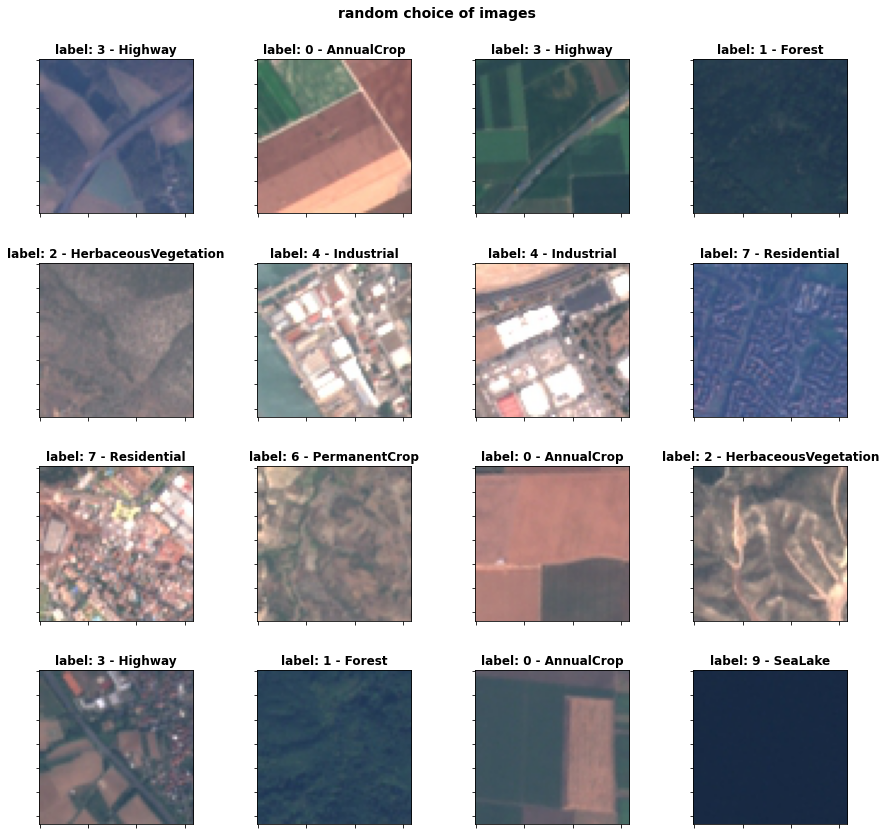

In [10]:
# Choose 16 random images and plot it
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
fig.tight_layout(h_pad=3, w_pad=3)
fig.suptitle(f"random choice of images", weight="bold", size=14)
fig.subplots_adjust(top=0.92)

i = 0
for ax in axs.flat:

  curr_label = label_ids[i]
  curr_label_name = label_names[curr_label]

  ax.set_title(f"label: {curr_label} - {curr_label_name}", fontweight="bold")
  ax.set_xticklabels([])
  ax.set_yticklabels([])

  ax.imshow(images[i])

  i += 1

In [11]:
# Read data until each class has at least 16 instances
class_images = {}

for i in range(len(label_names)):

  class_images[i] = []

  
classes_prepared = 0
k = 0
while True:

  print(f"----------")
  print(f"batch number: {k}")
  k += 1

  tensor_images, label_tensor = next(iter(dataloader))

  # change channels to be able to visualize images 
  images = [img.permute(1, 2, 0) for img in tensor_images]
  label_ids = [tensor.item() for tensor in label_tensor]

  i = 0
  for img in images:
  
    class_images[label_ids[i]].append(img)

    if len(class_images[label_ids[i]]) == BATCH_SIZE:
           classes_prepared += 1
    i += 1
  
  print(f"classes with enough examples: {classes_prepared} / {len(class_images.keys())}")

  if classes_prepared == len(class_images.keys()):

    total_count = 0
    for key in class_images:
      total_count += len(class_images[key])

    print(f"\ntotal examples: {total_count}")
    break


----------
batch number: 0
classes with enough examples: 0 / 10
----------
batch number: 1
classes with enough examples: 0 / 10
----------
batch number: 2
classes with enough examples: 0 / 10
----------
batch number: 3
classes with enough examples: 0 / 10
----------
batch number: 4
classes with enough examples: 0 / 10
----------
batch number: 5
classes with enough examples: 0 / 10
----------
batch number: 6
classes with enough examples: 0 / 10
----------
batch number: 7
classes with enough examples: 0 / 10
----------
batch number: 8
classes with enough examples: 5 / 10
----------
batch number: 9
classes with enough examples: 5 / 10
----------
batch number: 10
classes with enough examples: 7 / 10
----------
batch number: 11
classes with enough examples: 7 / 10
----------
batch number: 12
classes with enough examples: 10 / 10

total examples: 416


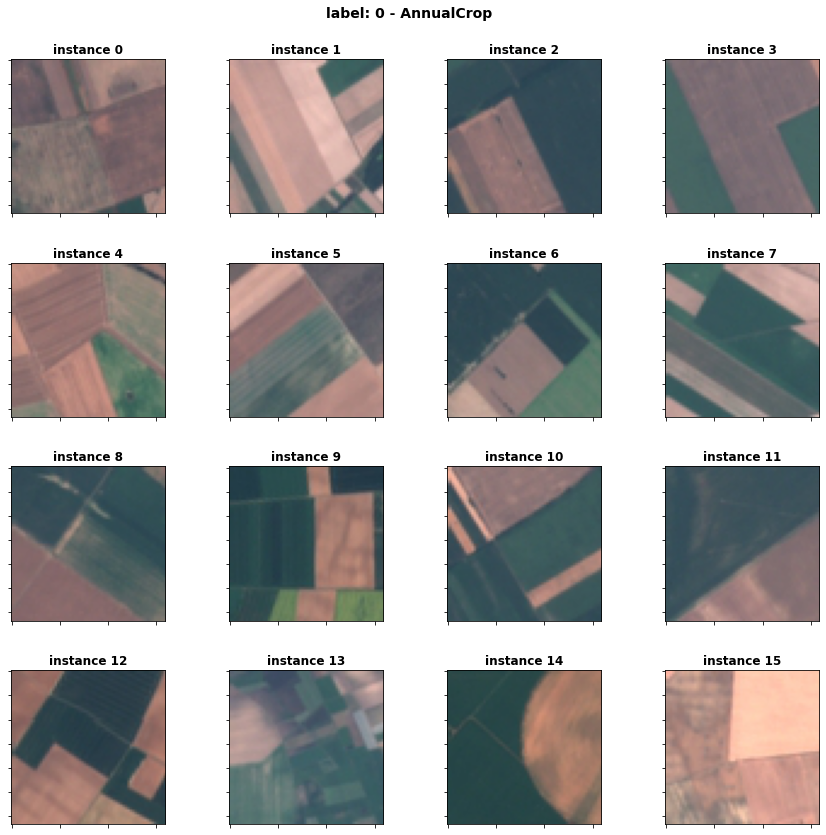


----------



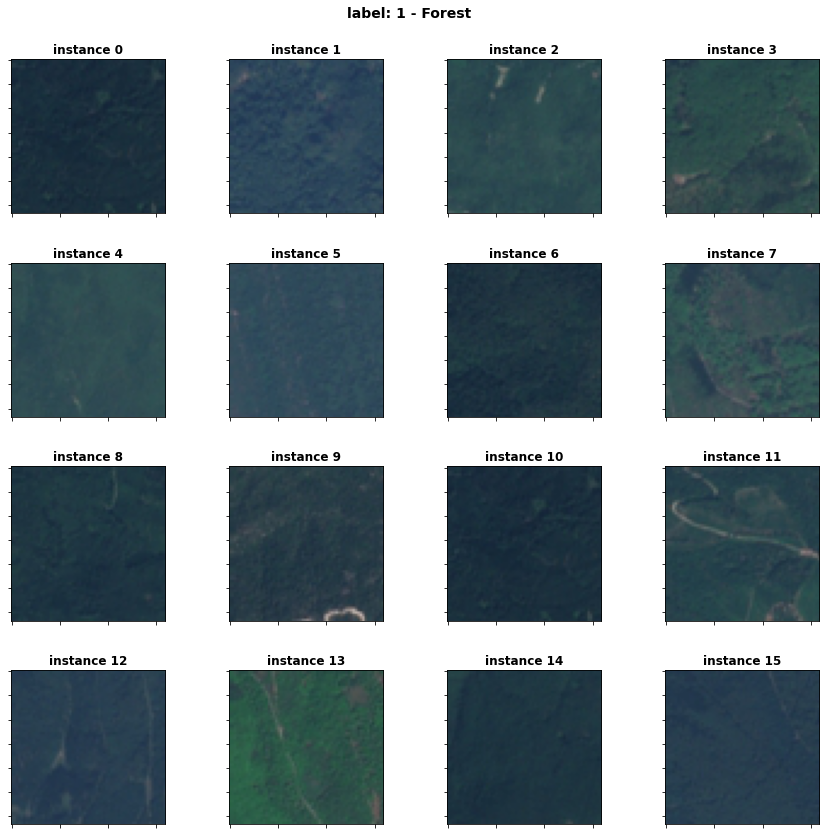


----------



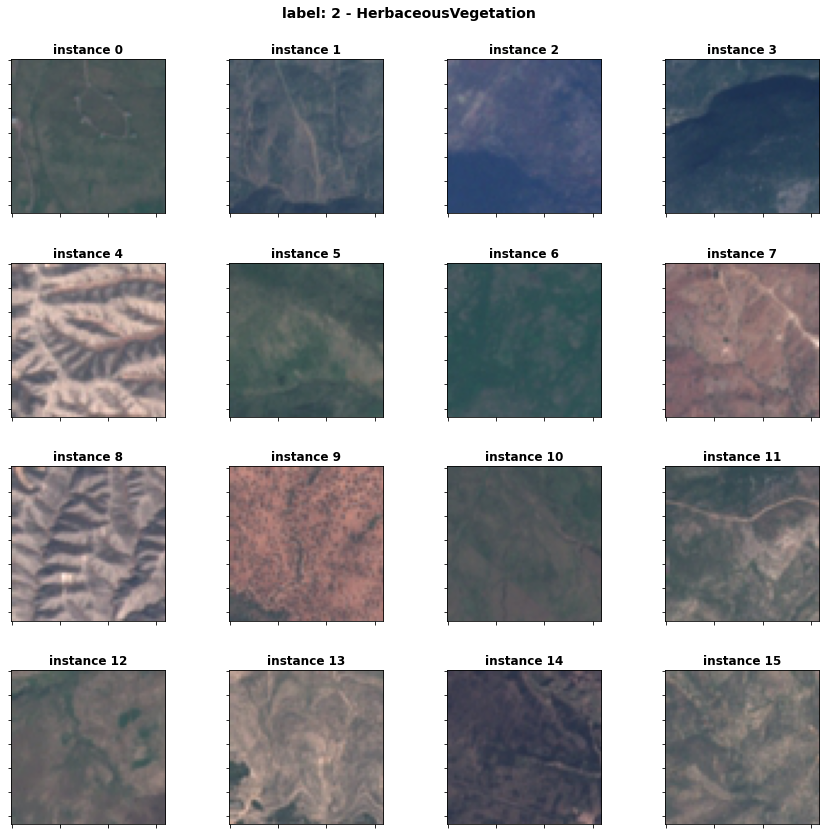


----------



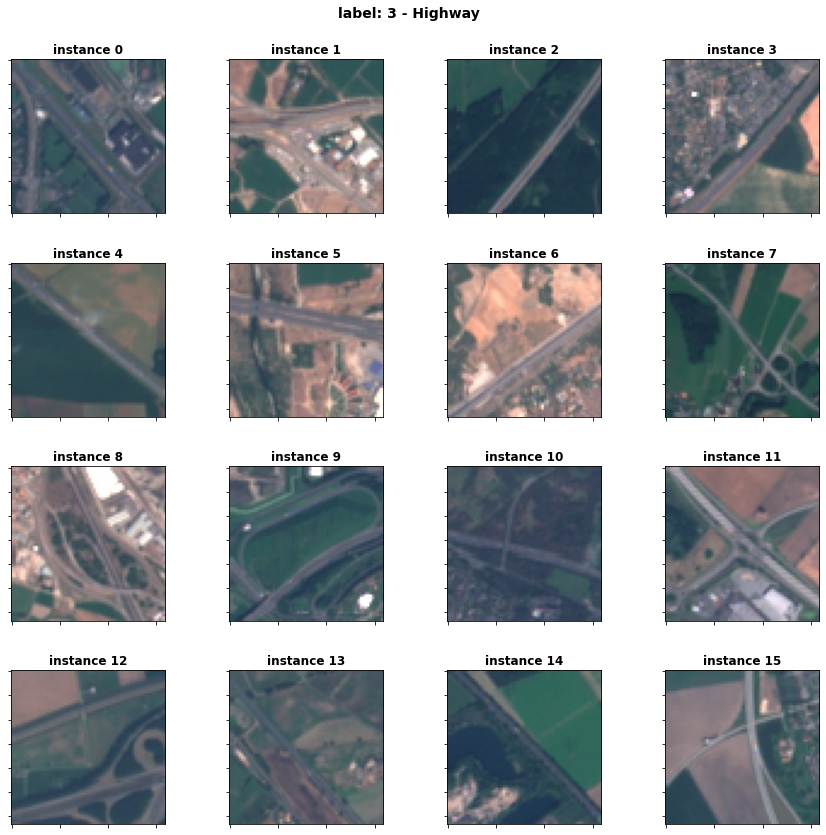


----------



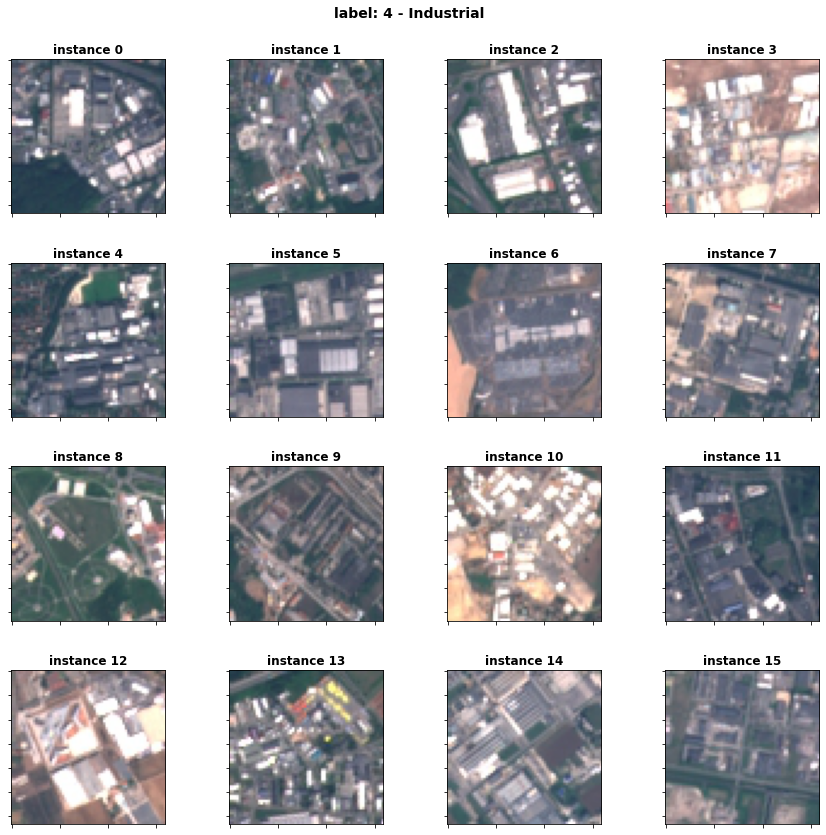


----------



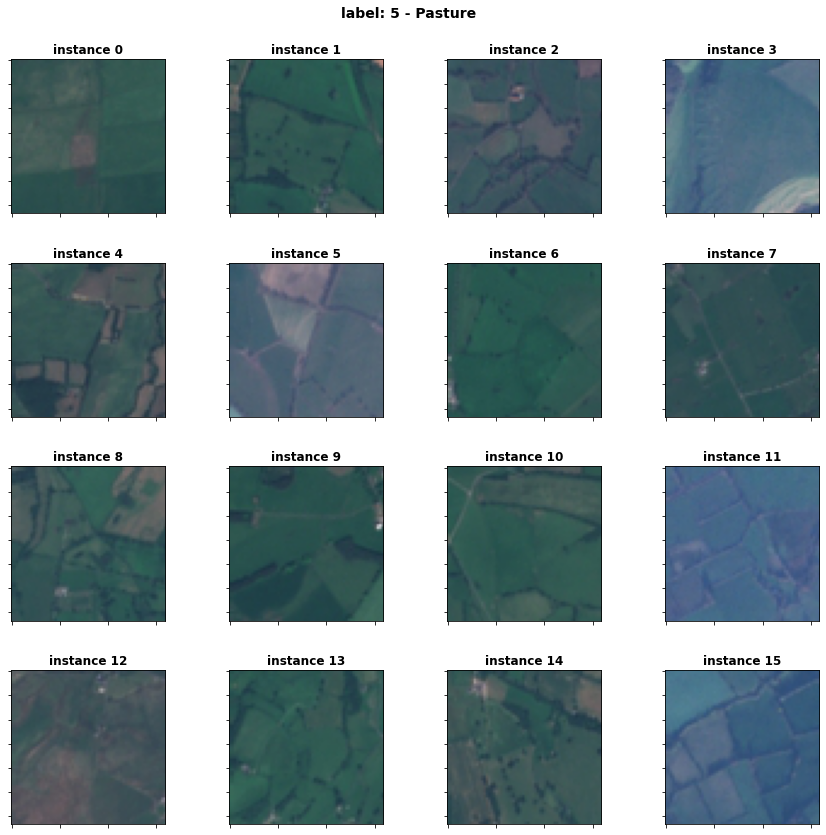


----------



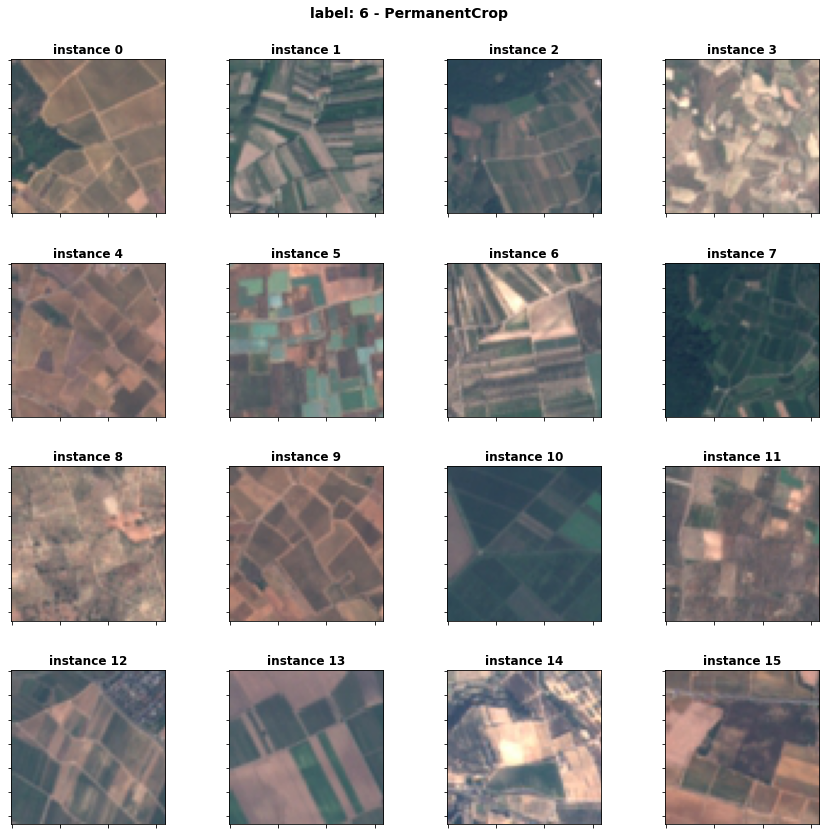


----------



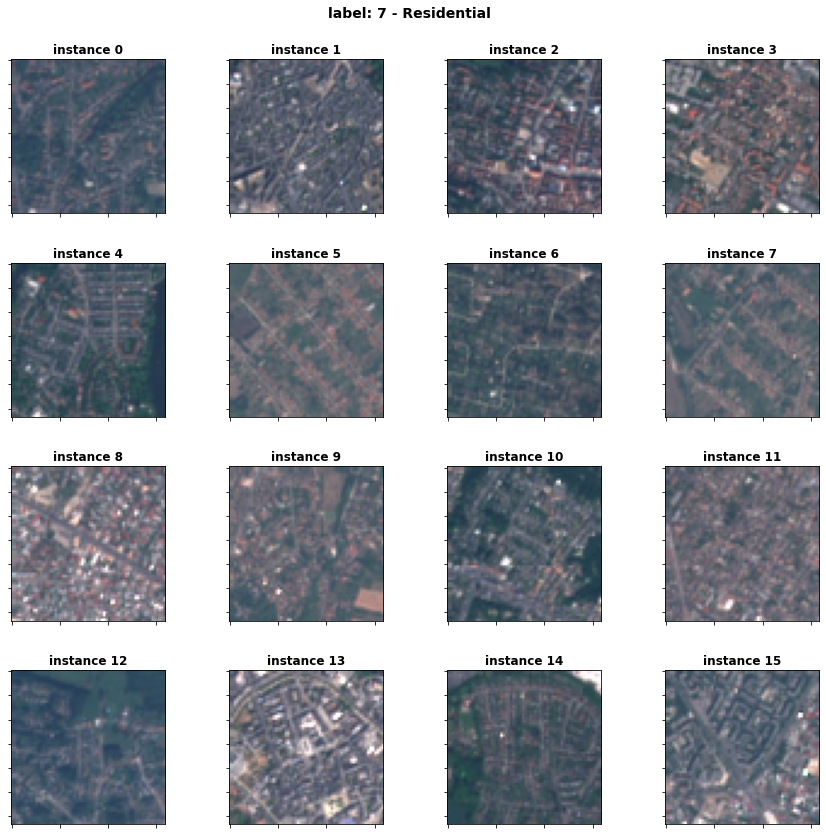


----------



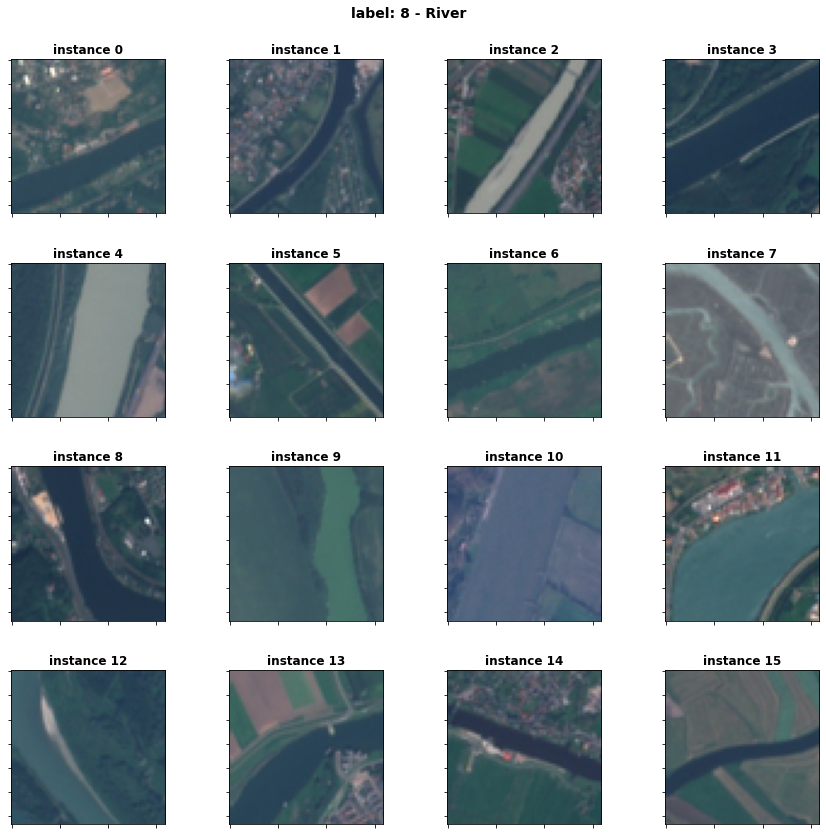


----------



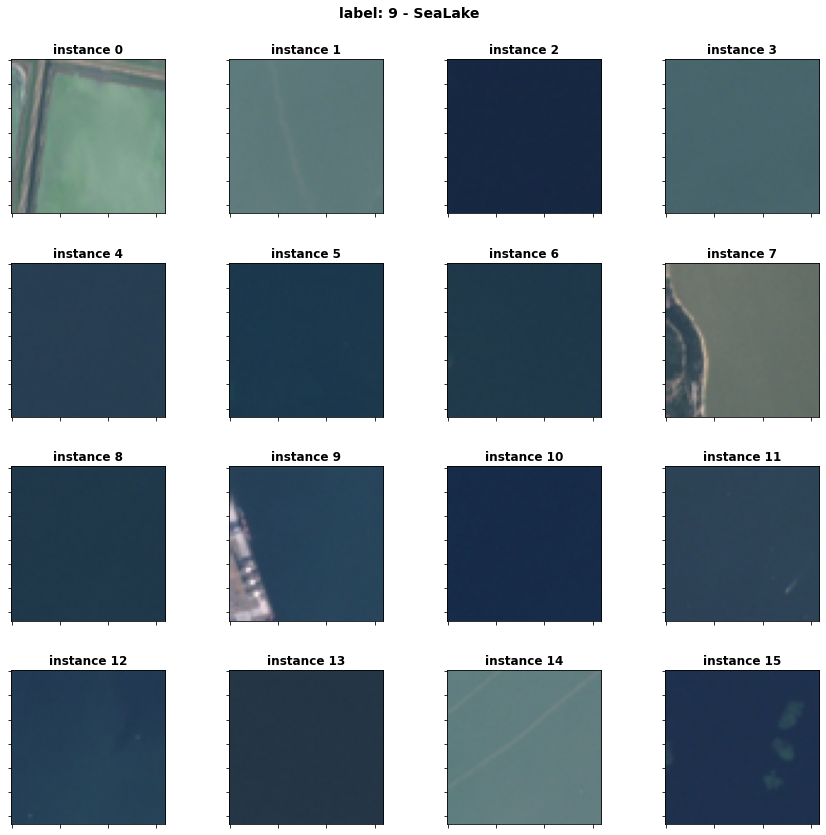


----------



In [12]:
# For each class, create plot with 16 of its instances
for label in class_images:

  curr_label_name = label_names[label]

  fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
  fig.tight_layout(h_pad=3, w_pad=3)
  fig.suptitle(f"label: {label} - {curr_label_name}", weight="bold", size=14)
  fig.subplots_adjust(top=0.92)

  i = 0
  for ax in axs.flat:

    ax.set_title(f"instance {i}", fontweight="bold")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(class_images[label][i])

    i += 1
  
  plt.show()
  
  print("\n----------\n")

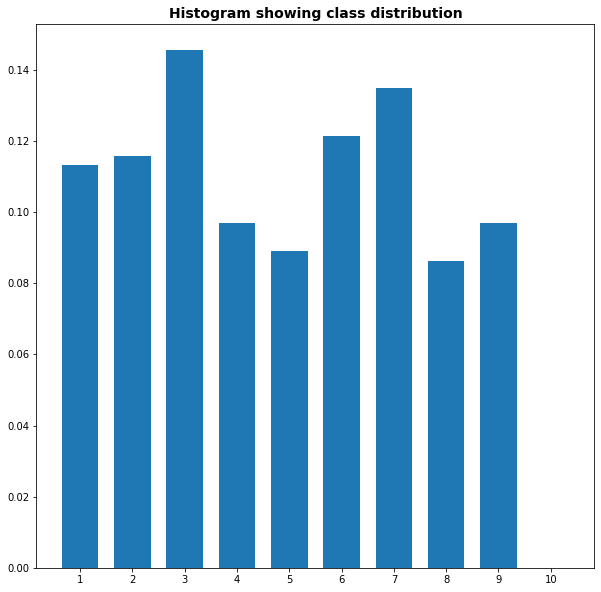

In [13]:
# Create histogram of the data that was read in (not whole data if batchsize is not 27000)
counts = [len(class_images[key]) for key in class_images]
bins = np.arange(len(list(class_images.keys())) + 1)

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Histogram showing class distribution", size=14, weight="bold")
ax.set_xticks(bins)
ax.hist(bins[:-1], bins + 0.5, weights=counts, rwidth=0.7, density=True)

plt.show()

In [14]:
# Read the whole data set
BATCH_SIZE = 27000

# create data loader
dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=True)

In [ ]:
tensor_images, label_tensor = next(iter(dataloader))

# change channels to be able to visualize images 
images = [img.permute(1, 2, 0) for img in tensor_images]
label_ids = [tensor.item() for tensor in label_tensor]

In [ ]:
# Calculate the distribution for all the data that was read in
distribution = {}

for label in label_ids:
  
  if label not in distribution.keys():
    distribution[label] = 1
  else:
    distribution[label] += 1

sorted_distribution = dict(sorted(distribution.items(), key=lambda x: x[0]))

bins = list(sorted_distribution.keys())
counts = list(sorted_distribution.values())


In [ ]:
# Plot the pie diagram of the data that was read in
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Pie diagram showing class distribution", size=14, weight="bold")
ax.set_xticks(bins)
ax.pie(counts, labels=list(label_names.values()), pctdistance=0.85, autopct='%1.1f%%')

plt.show()